# Clinical Data Checks

Provides summary description and plots of clinical data.  The clinical data file is a csv file with the first column as the patient ID and the remaining columns are clinical data.  

In [1]:
# Load libraries and define settings
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
%matplotlib inline

import seaborn as sns
sns.set_style('ticks')
sns.set_palette("muted")

# Load plot functions
from ClinPlots import plot_1col_boxhist, plot_2col_boxhist, plot_1col_bar, plot_2col_bars

In [2]:
# Location and name of file to check
clinFile = '/Users/sandra/UKPSSR/data/T2updated.csv'

## Examine the data

In [3]:
# Load dataset
dataset = pd.read_csv(clinFile, header = 0, index_col = 0)
print("Number of Rows, Columns = ", dataset.shape)

Number of Rows, Columns =  (1088, 52)


In [4]:
# Convert columns of type object to category and split dataset into category and numerical
cat_list = dataset.select_dtypes(['object']).columns.tolist()
dataset[cat_list] = dataset[cat_list].apply(pd.Series.astype, dtype='category')
dataset_cat = dataset[cat_list]

# split dataset into a numerical dataset and categorical dataset
num_list = dataset.select_dtypes(['float64']).columns.tolist()
dataset_num = dataset[num_list]

### Data Types

In [5]:
# Display the datatypes of each column
dataset.dtypes

Height cm                 float64
Weight kg                 float64
Diastolic                 float64
Systolic                  float64
ESSDAI                    float64
ESSPRI                    float64
EULAR-SS                  float64
clinESSDAI                float64
COMPASS2                  float64
OGS                       float64
SchirmersLeft             float64
SchirmersRight            float64
AntiLa                   category
AntiRo                   category
IgA                       float64
IgG                       float64
IgM                       float64
C3 protein                float64
C4 protein                float64
CK                        float64
CRP mg/L                  float64
Cryoglobulin              float64
ESR mm/hr                 float64
Haemoglobin g/dL          float64
Lymphocytes               float64
Neutrophils               float64
Paraprotein               float64
Platelets                 float64
TSH                       float64
WhiteCellCount

### Summary of Numerical Data

In [6]:
# For numerical data provide a summary (count, mean, std, min, max and quartiles)
for i in range(0, len(dataset_num.columns), 3):
    df1 = dataset_num.iloc[:,i:(i+3)]
    print (df1.describe())
    print ("\n")

       Height cm  Weight kg  Diastolic
count    294.000    298.000    295.000
mean     163.220     72.626     76.078
std        8.532     15.191     10.432
min      144.000     39.800     52.000
25%      157.000     61.000     69.000
50%      162.000     70.750     76.000
75%      167.000     81.275     83.000
max      190.000    121.200    106.000


       Systolic  ESSDAI  ESSPRI
count   295.000 304.000 301.000
mean    129.969   4.421   5.771
std      17.906   5.466   2.127
min      87.000   0.000   0.000
25%     117.500   1.000   4.670
50%     130.000   2.000   6.000
75%     141.000   6.000   7.670
max     186.000  37.000  10.000


       EULAR-SS  clinESSDAI  COMPASS2
count   301.000     304.000    28.000
mean      6.452       4.609    40.409
std       2.331       6.342    17.027
min       0.000       0.000     8.650
25%       5.000       0.000    29.785
50%       7.000       2.000    38.335
75%       8.000       7.000    46.358
max      10.000      43.000    82.090


          OGS

### Distribution Plots of Numerical Data

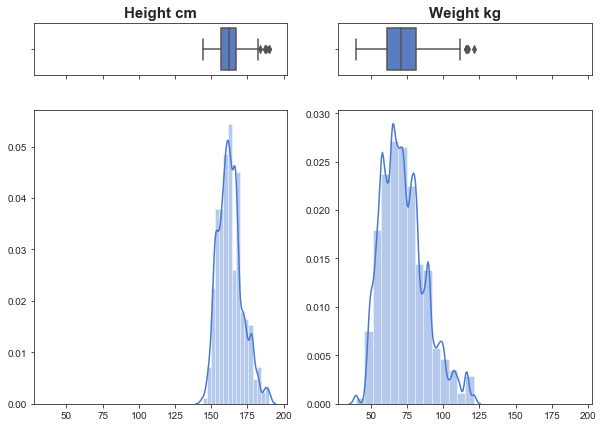

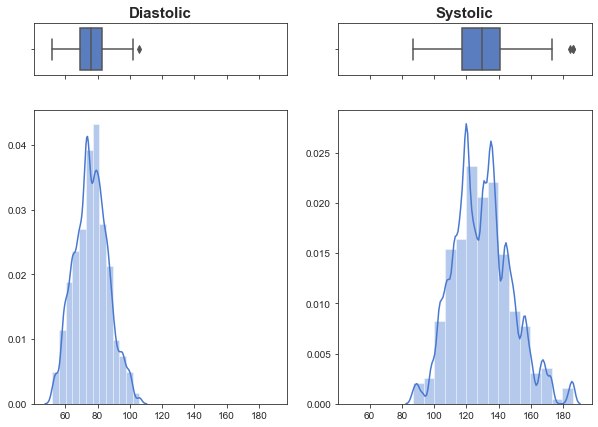

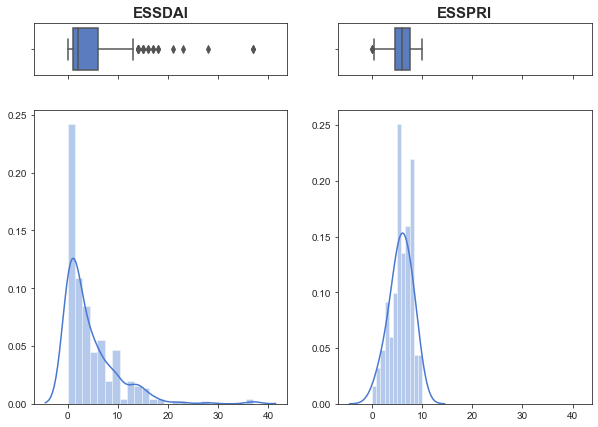

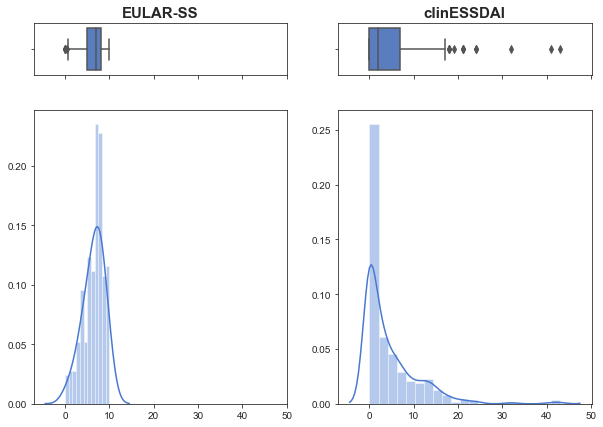

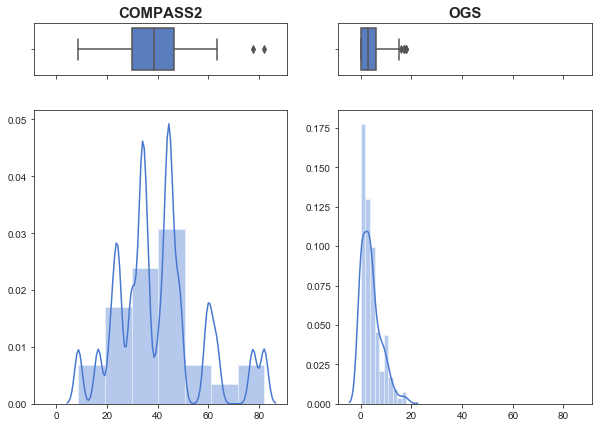

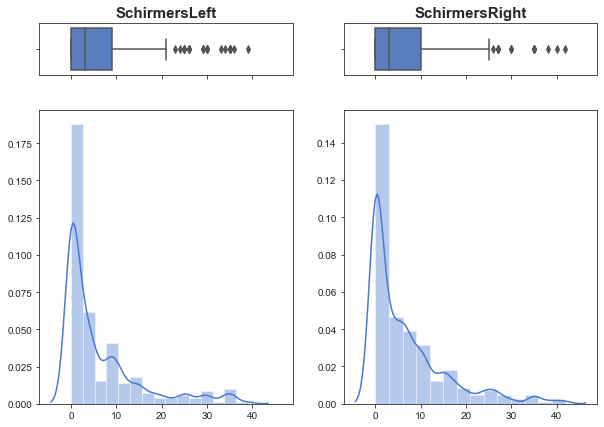

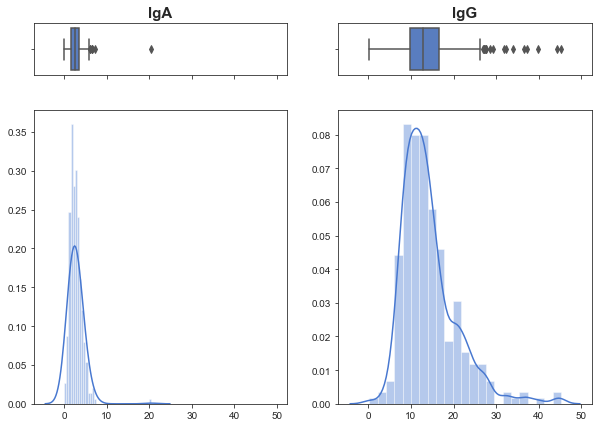

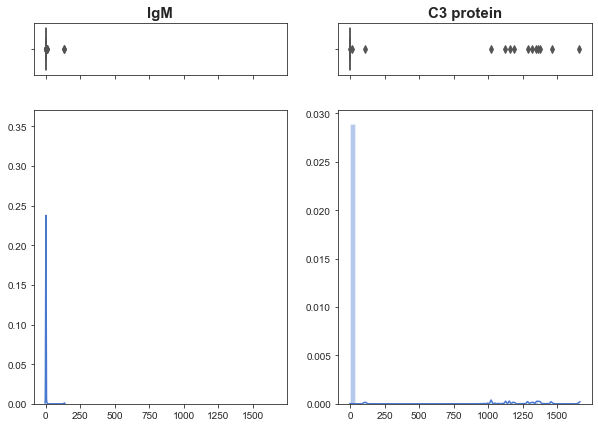

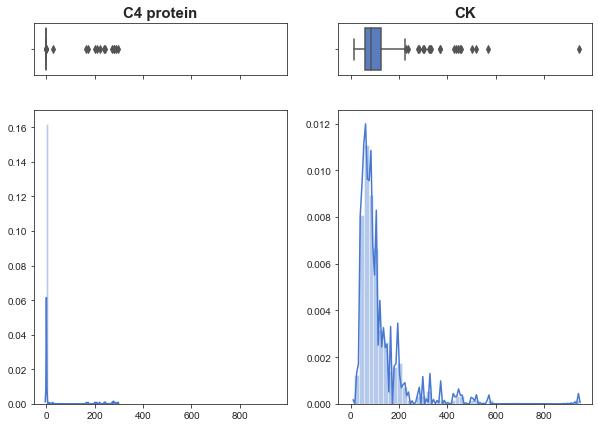

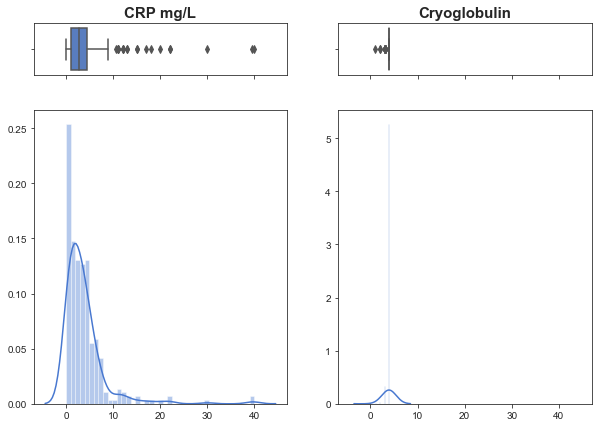

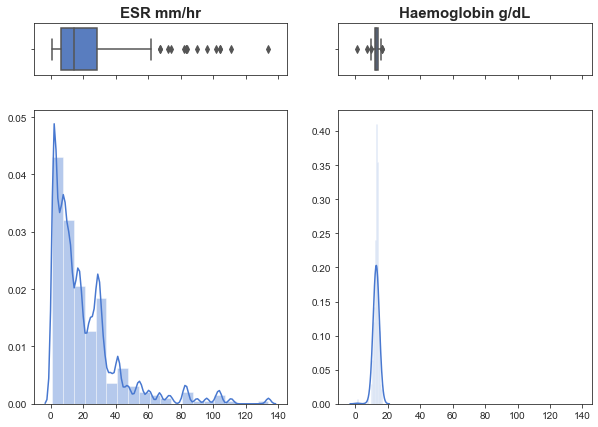

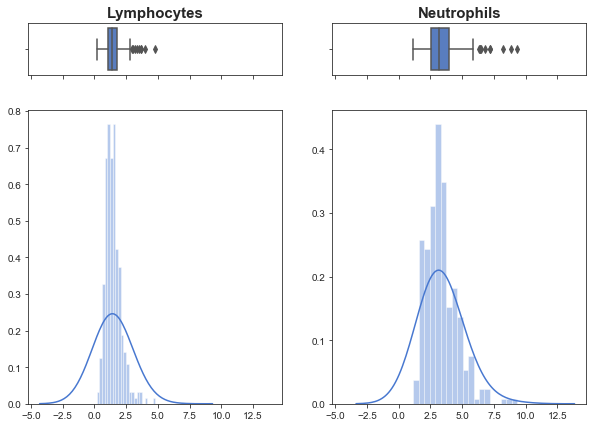

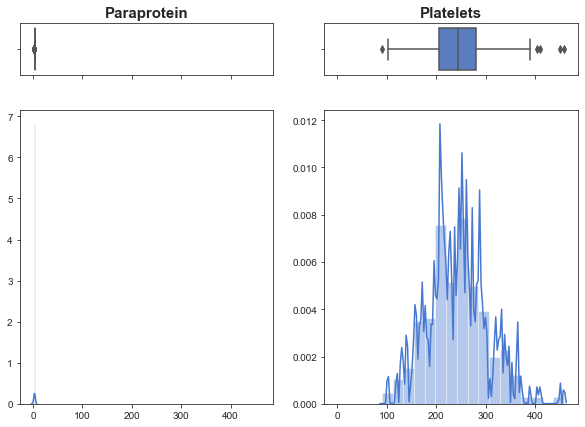

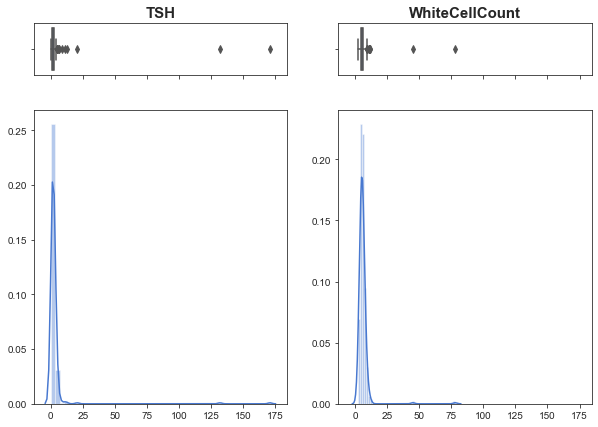

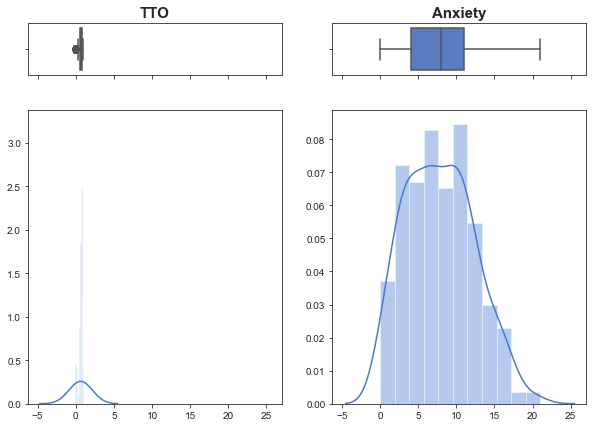

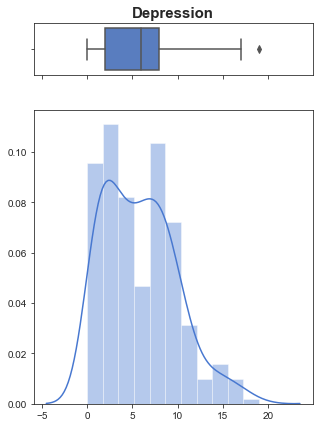

In [7]:
for i in range(0, len(dataset_num.columns), 2):
    if len(dataset_num.columns) - i != 1:
        plot_2col_boxhist(dataset_num, [dataset_num.columns[i],dataset_num.columns[i+1]])
    else:
        plot_1col_boxhist(dataset_num, dataset_num.columns[i])


### Summary of Categorical Data

In [8]:
#dataset_cat.describe()
for i in range(0, len(dataset_cat.columns), 3):
    df1 = dataset_cat.iloc[:,i:(i+3)]
    print (df1.describe())
    print ("\n")

       AntiLa AntiRo Analgesics
count       2      2        308
unique      1      2          3
top        No    Yes    Present
freq        2      1        161


       Azathioprine Civemiline Corticosteroids
count           308        308             308
unique            3          3               3
top           Never      Never           Never
freq            269        306             170


       Cyclophosphamide Etanercept Hydroxycholoquine
count               308        308               308
unique                2          1                 3
top               Never      Never           Present
freq                303        308               129


         IVIg IVcorticosteroids Immunosuppressives
count     308               308                308
unique      2                 3                  2
top     Never             Never                Yes
freq      304               268                252


       Infliximab LachrymalSubstitute Leflunomide
count         308          

### Plots of Categorical Data

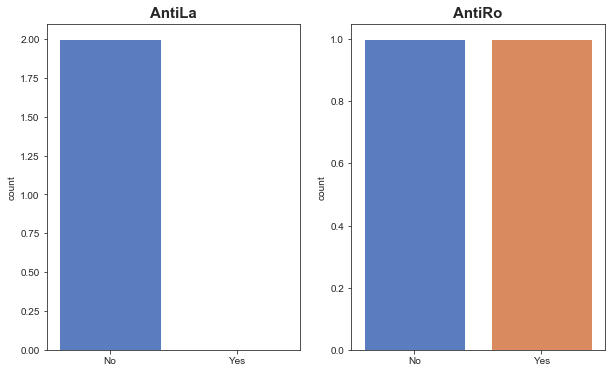

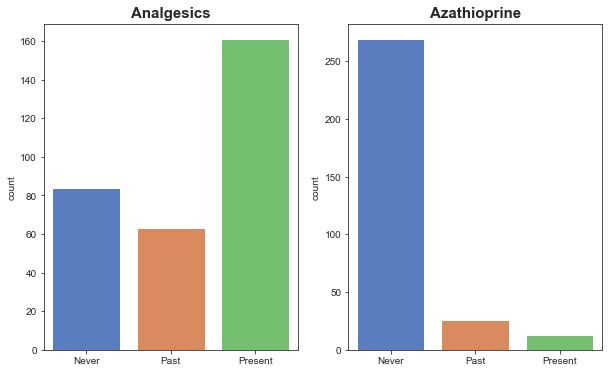

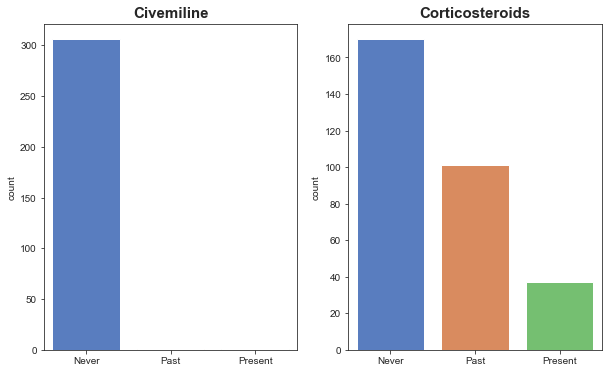

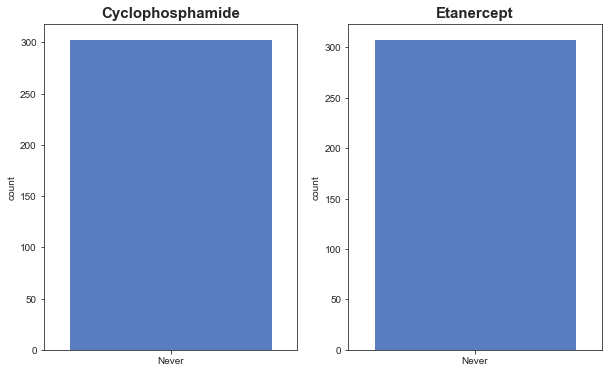

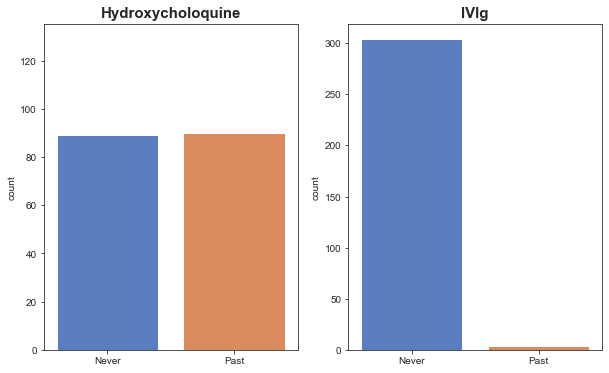

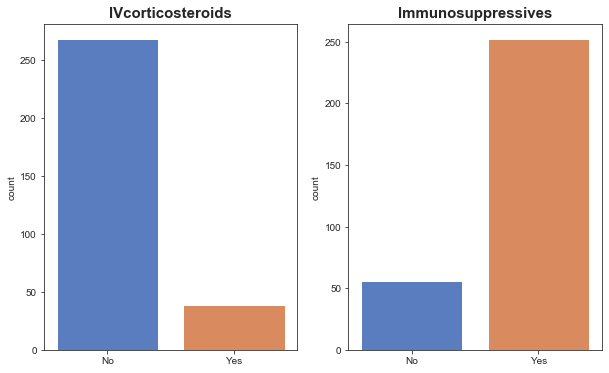

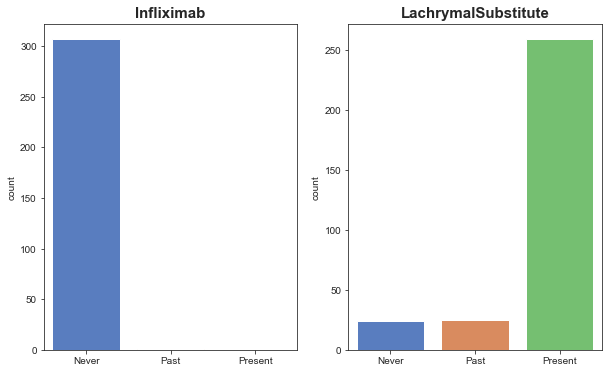

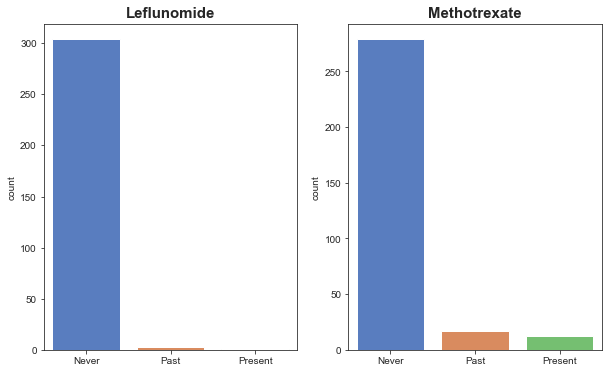

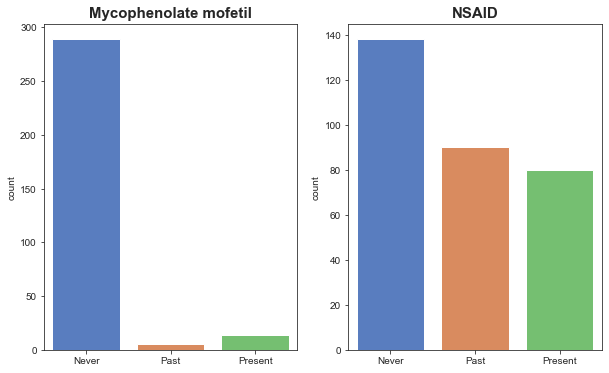

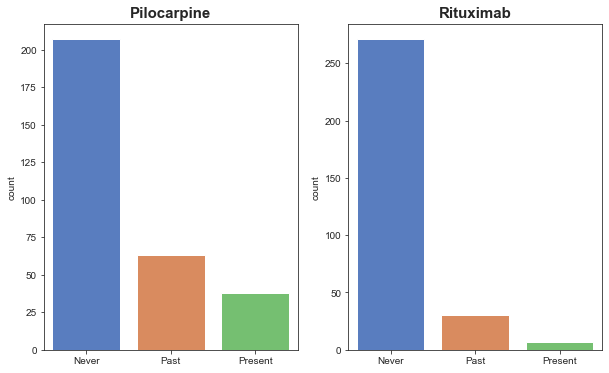

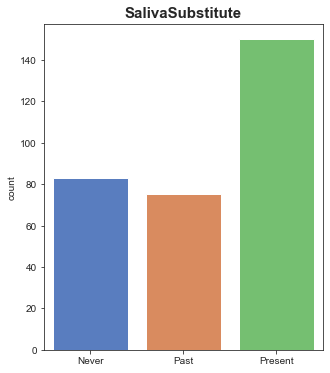

In [9]:
for i in range(0, len(dataset_cat.columns), 2):
    if len(dataset_cat.columns) - i != 1:
        plot_2col_bars(dataset_cat, [dataset_cat.columns[i],dataset_cat.columns[i+1]])
    else:
        plot_1col_bar(dataset_cat, dataset_cat.columns[i])
